In [1]:
import tensorflow as tf
# import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
print (mnist.train.images.shape)

C:\Users\p\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
(55000, 784)


In [ ]:
sample_img = mnist.train.images[5].reshape(28, 28)
print(sample_img)

In [3]:
import matplotlib.pyplot as plt

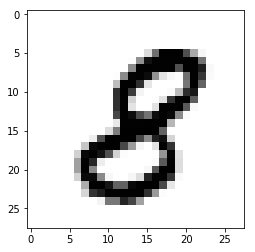

In [4]:
plt.imshow(sample_img).set_cmap('Greys')

In [5]:
# check MNIST labels shape
print(mnist.train.labels.shape)

# show MNIST label data
print(mnist.train.labels[5])

(55000, 10)
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [6]:
import tensorflow as tf
x = tf.placeholder(tf.float32, [None, 784]) # a placeholder for inputting the image 
W = tf.Variable(tf.zeros([784, 10])) # weights
b = tf.Variable(tf.zeros([10])) # biases
y = tf.nn.softmax(tf.matmul(x, W) + b)

The sum of softmax: 0.9999999999999999


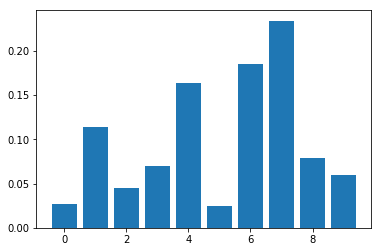

In [11]:
def softmax(n):
  return np.exp(n) / np.sum(np.exp(n))

s = softmax(n)
plt.bar(i, s)
print('The sum of softmax: ' + str(np.sum(s)))

In [12]:
y_ = tf.placeholder(tf.float32, [None, 10]) # the training labels
cross_entropy = -tf.reduce_sum(y_ * tf.log(y))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)
train_step

<tf.Operation 'GradientDescent' type=NoOp>

<Container object of 10 artists>

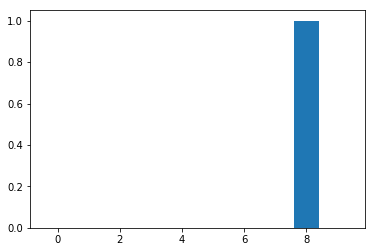

In [13]:
# label
label = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])
plt.bar(i, label)

In [14]:
def cross_entropy(x, _y):
  return -np.sum(_y * np.log(x))
cross_entropy

<function __main__.cross_entropy>

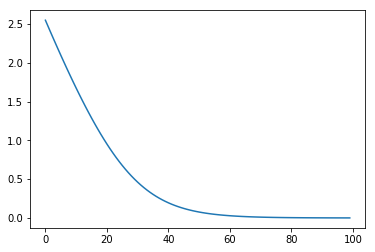

In [15]:
cross_ent = []
for i in range(0, 100):
  cross_ent.append(cross_entropy(softmax(n), label))
  n[8] += 0.1
plt.plot(cross_ent)

In [16]:

# supress warning messages
tf.logging.set_verbosity(tf.logging.ERROR)

# initialize variables and session
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)


In [17]:
for i in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

print('Training Finished.')

Training Finished.


In [18]:

predict_label = tf.argmax(y, 1)
predicted_labels = sess.run(predict_label, {x: mnist.test.images})
print(predicted_labels)

[7 2 1 ... 4 5 6]


  Correct label: 4
Predicted label: 4


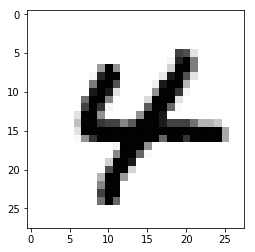

In [25]:
def show_image_and_predicted_label(x):
  print("  Correct label: " + str(np.argmax(mnist.test.labels[x])))
  print("Predicted label: " + str(predicted_labels[x]))
  plt.imshow(mnist.test.images[x].reshape(28, 28)).set_cmap('Greys')
  return x

show_image_and_predicted_label(5500);

In [26]:
is_prediction_correct = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
calc_accuracy = tf.reduce_mean(tf.cast(is_prediction_correct, "float"))
accuracy = sess.run(calc_accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
print('Accuracy: ' + str(accuracy))

Accuracy: 0.9201
